# DS 7333 - Quantifying the World
## Case Study #6: "Searching for Exotic Particles in High-Energy Physics with Deep Learning"¶

Sterling Beason, Sean Kennedy, Emil Ramos

In [1]:
import pandas as pd
#tf.logging.set_verbosity(tf.logging.ERROR)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.3.0


### Import Data (subset)

In [3]:
# import data
nrows = 1000000
data = pd.read_csv("./data/HIGGS.csv", nrows=nrows, header=None)
data[0] = data[0].astype(int)
print(f"Using {nrows} rows of entire dataset")

Using 1000000 rows of entire dataset


### Partition Data

In [4]:
# Partition data
X = data.iloc[:,range(1,22)].values
y = data[0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7333)

### Build Model

In [5]:
# model
#tf.keras.backend.set_floatx('float64')
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Train Model

In [6]:
# early stopping callback
es = EarlyStopping(monitor = "accuracy", min_delta = 0.01, patience = 4)

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    callbacks=[es],
    epochs=12, 
    batch_size=32
)

Epoch 1/12
25000/25000 [==============================] - 20s 810us/step - loss: 0.6652 - accuracy: 0.6004 - val_loss: 0.6452 - val_accuracy: 0.6258
Epoch 2/12
25000/25000 [==============================] - 20s 792us/step - loss: 0.6368 - accuracy: 0.6389 - val_loss: 0.6456 - val_accuracy: 0.6309
Epoch 3/12
25000/25000 [==============================] - 20s 791us/step - loss: 0.6274 - accuracy: 0.6512 - val_loss: 0.6328 - val_accuracy: 0.6433
Epoch 4/12
25000/25000 [==============================] - 20s 800us/step - loss: 0.6232 - accuracy: 0.6574 - val_loss: 0.6262 - val_accuracy: 0.6559
Epoch 5/12
25000/25000 [==============================] - 21s 825us/step - loss: 0.6207 - accuracy: 0.6607 - val_loss: 0.6250 - val_accuracy: 0.6595
Epoch 6/12
25000/25000 [==============================] - 21s 821us/step - loss: 0.6194 - accuracy: 0.6622 - val_loss: 0.6185 - val_accuracy: 0.6630
Epoch 7/12
25000/25000 [==============================] - 20s 806us/step - loss: 0.6166 - accuracy: 0.6639

### Evaluate Model

Accuracy: 0.6677550077438354


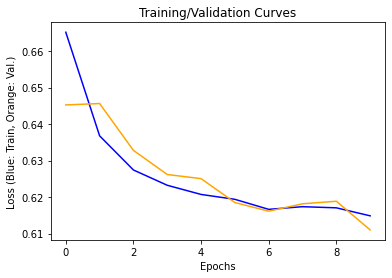

In [7]:
model_scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', model_scores[1])

plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.ylabel('Loss (Blue: Train, Orange: Val.)')
plt.xlabel('Epochs')
plt.title('Training/Validation Curves')
plt.show()